<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X, y = shuffle(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train = X_train.astype('float32') / 255.
  X_test = X_test.astype('float32') / 255.
  
  return X_train, y_train, X_test, y_test

In [2]:
path = 'quickdraw10.npz'
load_quickdraw10(path)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0, 6, 5, ..., 4, 7, 1]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([9, 7, 7, ..., 1, 3, 8]))

In [3]:
X_train, y_train, X_test, y_test = load_quickdraw10(path)
y_train

array([2, 2, 4, ..., 6, 9, 6])

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten
def create_model(learning_rate=0.01, opt='SGD'):
    
    model = Sequential([
                        Dense(32, activation='relu', input_dim=784),
                        Dense(32, activation='relu'),
                        Dense(10, activation='softmax')
                        ])
    model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [5]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [6]:
bt4 = model.fit(X_train, y_train,
    epochs=25,
    batch_size=4,
    validation_data=(X_test, y_test)
)

Epoch 1/25
20000/20000 [==============================] - 23s 1ms/step - loss: 0.7919 - accuracy: 0.7578 - val_loss: 0.6429 - val_accuracy: 0.8098
Epoch 2/25
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5935 - accuracy: 0.8213 - val_loss: 0.5773 - val_accuracy: 0.8264
Epoch 3/25
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5404 - accuracy: 0.8366 - val_loss: 0.5587 - val_accuracy: 0.8336
Epoch 4/25
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5119 - accuracy: 0.8445 - val_loss: 0.5533 - val_accuracy: 0.8372
Epoch 5/25
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4919 - accuracy: 0.8523 - val_loss: 0.5430 - val_accuracy: 0.8396
Epoch 6/25
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4760 - accuracy: 0.8554 - val_loss: 0.5286 - val_accuracy: 0.8416
Epoch 7/25
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4634 - accuracy: 0.8594 - val_loss: 0

In [7]:
bt16 = model.fit(X_train, y_train,
    epochs=25,
    batch_size=16,
    validation_data=(X_test, y_test)
)

Epoch 1/25
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3297 - accuracy: 0.9014 - val_loss: 0.5323 - val_accuracy: 0.8480
Epoch 2/25
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3235 - accuracy: 0.9032 - val_loss: 0.5370 - val_accuracy: 0.8467
Epoch 3/25
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3216 - accuracy: 0.9033 - val_loss: 0.5386 - val_accuracy: 0.8481
Epoch 4/25
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3191 - accuracy: 0.9043 - val_loss: 0.5424 - val_accuracy: 0.8474
Epoch 5/25
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3183 - accuracy: 0.9049 - val_loss: 0.5491 - val_accuracy: 0.8481
Epoch 6/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.3170 - accuracy: 0.9052 - val_loss: 0.5471 - val_accuracy: 0.8469
Epoch 7/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.3160 - accuracy: 0.9049 - val_loss: 0.5494 - val_accuracy:

In [8]:
model = create_model()

bt32 = model.fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1385 - accuracy: 0.6522 - val_loss: 0.8697 - val_accuracy: 0.7456
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8106 - accuracy: 0.7622 - val_loss: 0.7688 - val_accuracy: 0.7757
Epoch 3/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7353 - accuracy: 0.7847 - val_loss: 0.7093 - val_accuracy: 0.7946
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6857 - accuracy: 0.8001 - val_loss: 0.6758 - val_accuracy: 0.8028
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6504 - accuracy: 0.8099 - val_loss: 0.6610 - val_accuracy: 0.8088
Epoch 6/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6230 - accuracy: 0.8170 - val_loss: 0.6357 - val_accuracy: 0.8143
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5997 - accuracy: 0.8243 - val_loss: 0.6193 - val_accuracy:

In [9]:
bt64 = model.fit(X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4309 - accuracy: 0.8720 - val_loss: 0.5224 - val_accuracy: 0.8479
Epoch 2/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4280 - accuracy: 0.8731 - val_loss: 0.5221 - val_accuracy: 0.8479
Epoch 3/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4256 - accuracy: 0.8736 - val_loss: 0.5235 - val_accuracy: 0.8471
Epoch 4/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4241 - accuracy: 0.8737 - val_loss: 0.5261 - val_accuracy: 0.8462
Epoch 5/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4223 - accuracy: 0.8748 - val_loss: 0.5216 - val_accuracy: 0.8462
Epoch 6/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4204 - accuracy: 0.8750 - val_loss: 0.5232 - val_accuracy: 0.8459
Epoch 7/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4183 - accuracy: 0.8756 - val_loss: 0.5250 - val_accuracy:

In [10]:
bt128 = model.fit(X_train, y_train,
    epochs=25,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/25
625/625 [==============================] - 2s 3ms/step - loss: 0.3849 - accuracy: 0.8860 - val_loss: 0.5224 - val_accuracy: 0.8485
Epoch 2/25
625/625 [==============================] - 2s 3ms/step - loss: 0.3842 - accuracy: 0.8860 - val_loss: 0.5220 - val_accuracy: 0.8482
Epoch 3/25
625/625 [==============================] - 2s 3ms/step - loss: 0.3838 - accuracy: 0.8857 - val_loss: 0.5230 - val_accuracy: 0.8493
Epoch 4/25
625/625 [==============================] - 2s 3ms/step - loss: 0.3832 - accuracy: 0.8863 - val_loss: 0.5227 - val_accuracy: 0.8493
Epoch 5/25
625/625 [==============================] - 2s 3ms/step - loss: 0.3822 - accuracy: 0.8868 - val_loss: 0.5235 - val_accuracy: 0.8487
Epoch 6/25
625/625 [==============================] - 2s 3ms/step - loss: 0.3818 - accuracy: 0.8862 - val_loss: 0.5234 - val_accuracy: 0.8482
Epoch 7/25
625/625 [==============================] - 2s 3ms/step - loss: 0.3808 - accuracy: 0.8870 - val_loss: 0.5244 - val_accuracy: 0.8490
Epoch 

In [13]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt4, bt16, bt32, bt64, bt128], ["4_", "16_", "32_", "64_", "128_"]):
    df_bt = pd.DataFrame.from_dict(exp.history)
    df_bt['epoch'] = df_bt.index.values
    df_bt['Batch Size'] = result
    batch_sizes.append(df_bt)

df_bt = pd.concat(batch_sizes)
df_bt['Batch Size'] = df_bt['Batch Size'].astype('str')
df_bt.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.791890,0.757850,0.642924,0.80975,0,4_
1,0.593503,0.821262,0.577268,0.82640,1,4_
2,0.540440,0.836575,0.558749,0.83365,2,4_
3,0.511925,0.844463,0.553292,0.83725,3,4_
4,0.491923,0.852325,0.542987,0.83965,4,4_


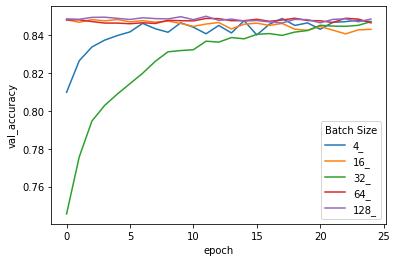

In [14]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df_bt);

Analysis:
* For 25 epochs, a Batch size of 32 is ideal because it is the fastest running model that provides roughly the same results as larger batch sizes

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [15]:
lrOne = create_model(learning_rate=1).fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1149 - accuracy: 0.6540 - val_loss: 0.8391 - val_accuracy: 0.7541
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7905 - accuracy: 0.7663 - val_loss: 0.7567 - val_accuracy: 0.7811
Epoch 3/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7226 - accuracy: 0.7872 - val_loss: 0.7048 - val_accuracy: 0.7923
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6763 - accuracy: 0.8021 - val_loss: 0.6765 - val_accuracy: 0.8049
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6402 - accuracy: 0.8126 - val_loss: 0.6469 - val_accuracy: 0.8109
Epoch 6/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6105 - accuracy: 0.8213 - val_loss: 0.6239 - val_accuracy: 0.8185
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5863 - accuracy: 0.8275 - val_loss: 0.6044 - val_accuracy:

In [16]:
lrTenth = create_model(learning_rate=.1).fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1563 - accuracy: 0.6358 - val_loss: 0.8559 - val_accuracy: 0.7497
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8115 - accuracy: 0.7619 - val_loss: 0.7720 - val_accuracy: 0.7808
Epoch 3/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7371 - accuracy: 0.7838 - val_loss: 0.7164 - val_accuracy: 0.7936
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6859 - accuracy: 0.7991 - val_loss: 0.6842 - val_accuracy: 0.8009
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6462 - accuracy: 0.8094 - val_loss: 0.6488 - val_accuracy: 0.8118
Epoch 6/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6165 - accuracy: 0.8173 - val_loss: 0.6376 - val_accuracy: 0.8131
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5917 - accuracy: 0.8246 - val_loss: 0.6193 - val_accuracy:

In [17]:
lr01 = create_model(learning_rate=.01).fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1216 - accuracy: 0.6528 - val_loss: 0.8365 - val_accuracy: 0.7555
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7852 - accuracy: 0.7689 - val_loss: 0.7583 - val_accuracy: 0.7801
Epoch 3/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7162 - accuracy: 0.7896 - val_loss: 0.7068 - val_accuracy: 0.7926
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6685 - accuracy: 0.8039 - val_loss: 0.6668 - val_accuracy: 0.8054
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6331 - accuracy: 0.8128 - val_loss: 0.6394 - val_accuracy: 0.8128
Epoch 6/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6072 - accuracy: 0.8201 - val_loss: 0.6249 - val_accuracy: 0.8147
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5849 - accuracy: 0.8251 - val_loss: 0.6087 - val_accuracy:

In [18]:
lr001 = create_model(learning_rate=.001).fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1782 - accuracy: 0.6290 - val_loss: 0.8804 - val_accuracy: 0.7363
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8167 - accuracy: 0.7620 - val_loss: 0.7712 - val_accuracy: 0.7772
Epoch 3/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7323 - accuracy: 0.7867 - val_loss: 0.7086 - val_accuracy: 0.7964
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6787 - accuracy: 0.8018 - val_loss: 0.6689 - val_accuracy: 0.8055
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6417 - accuracy: 0.8113 - val_loss: 0.6457 - val_accuracy: 0.8107
Epoch 6/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6132 - accuracy: 0.8197 - val_loss: 0.6242 - val_accuracy: 0.8177
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5913 - accuracy: 0.8262 - val_loss: 0.6131 - val_accuracy:

In [19]:
lr0001 = create_model(learning_rate=.0001).fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1401 - accuracy: 0.6434 - val_loss: 0.8529 - val_accuracy: 0.7494
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8032 - accuracy: 0.7648 - val_loss: 0.7627 - val_accuracy: 0.7785
Epoch 3/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7201 - accuracy: 0.7894 - val_loss: 0.7014 - val_accuracy: 0.7997
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6675 - accuracy: 0.8045 - val_loss: 0.6623 - val_accuracy: 0.8090
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6316 - accuracy: 0.8139 - val_loss: 0.6326 - val_accuracy: 0.8167
Epoch 6/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6030 - accuracy: 0.8222 - val_loss: 0.6132 - val_accuracy: 0.8191
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5791 - accuracy: 0.8284 - val_loss: 0.5976 - val_accuracy:

In [20]:
learning_rates = []

for exp, result in zip([lrOne, lrTenth, lr01, lr001, lr0001], ["1", ".1", ".01", ".001", ".0001"]):
    df_lr = pd.DataFrame.from_dict(exp.history)
    df_lr['epoch'] = df_lr.index.values
    df_lr['learning_rate'] = result
    learning_rates.append(df_lr)

df_lr = pd.concat(learning_rates)
df_lr['learning_rate'] = df_lr['learning_rate'].astype('str')
df_lr.head()

,loss,accuracy,val_loss,val_accuracy,epoch,learning_rate
0,1.114912,0.653988,0.839144,0.75410,0,1
1,0.790485,0.766288,0.756676,0.78105,1,1
2,0.722579,0.787162,0.704776,0.79230,2,1
3,0.676279,0.802137,0.676546,0.80490,3,1
4,0.640222,0.812625,0.646921,0.81095,4,1


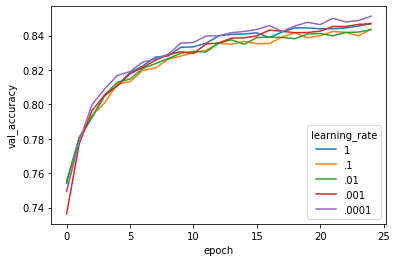

In [21]:
sns.lineplot(x='epoch', y='val_accuracy', hue='learning_rate', data=df_lr);

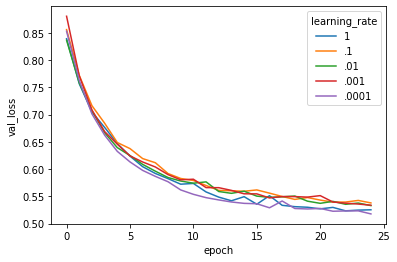

In [32]:
sns.lineplot(x='epoch', y='val_loss', hue='learning_rate', data=df_lr);

Analysis:
* Lower Learning Rates yield lower loss and higher accuracy metrics.

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [22]:
optSGD = create_model(learning_rate=1).fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1653 - accuracy: 0.6424 - val_loss: 0.8582 - val_accuracy: 0.7513
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8046 - accuracy: 0.7639 - val_loss: 0.7635 - val_accuracy: 0.7796
Epoch 3/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7254 - accuracy: 0.7877 - val_loss: 0.7068 - val_accuracy: 0.7939
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6728 - accuracy: 0.8028 - val_loss: 0.6655 - val_accuracy: 0.8044
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6339 - accuracy: 0.8131 - val_loss: 0.6351 - val_accuracy: 0.8144
Epoch 6/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6035 - accuracy: 0.8209 - val_loss: 0.6252 - val_accuracy: 0.8178
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5806 - accuracy: 0.8275 - val_loss: 0.6052 - val_accuracy:

In [23]:
optAdam = create_model(learning_rate=1, opt='adam').fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7746 - accuracy: 0.7685 - val_loss: 0.6197 - val_accuracy: 0.8155
Epoch 2/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5774 - accuracy: 0.8273 - val_loss: 0.5744 - val_accuracy: 0.8303
Epoch 3/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5285 - accuracy: 0.8424 - val_loss: 0.5536 - val_accuracy: 0.8373
Epoch 4/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4981 - accuracy: 0.8508 - val_loss: 0.5433 - val_accuracy: 0.8393
Epoch 5/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4777 - accuracy: 0.8572 - val_loss: 0.5322 - val_accuracy: 0.8440
Epoch 6/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4611 - accuracy: 0.8609 - val_loss: 0.5342 - val_accuracy: 0.8438
Epoch 7/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4482 - accuracy: 0.8657 - val_loss: 0.5373 - val_accuracy:

In [24]:
optRMSprop = create_model(learning_rate=1, opt='RMSprop').fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.8063 - accuracy: 0.7588 - val_loss: 0.6763 - val_accuracy: 0.7986
Epoch 2/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6081 - accuracy: 0.8196 - val_loss: 0.5871 - val_accuracy: 0.8285
Epoch 3/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5498 - accuracy: 0.8363 - val_loss: 0.5780 - val_accuracy: 0.8333
Epoch 4/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5201 - accuracy: 0.8456 - val_loss: 0.5630 - val_accuracy: 0.8382
Epoch 5/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8517 - val_loss: 0.5699 - val_accuracy: 0.8396
Epoch 6/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4911 - accuracy: 0.8549 - val_loss: 0.5822 - val_accuracy: 0.8362
Epoch 7/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4824 - accuracy: 0.8578 - val_loss: 0.5715 - val_accuracy:

In [25]:
optFtrl = create_model(learning_rate=1, opt='Ftrl').fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.0971
Epoch 2/25
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.0971
Epoch 3/25
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.0971
Epoch 4/25
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.0971
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.0971
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.0971
Epoch 7/25
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy:

In [26]:
optAdaDelta = create_model(learning_rate=1, opt='Adadelta').fit(X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2.3729 - accuracy: 0.1438 - val_loss: 2.3338 - val_accuracy: 0.1558
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2.2979 - accuracy: 0.1737 - val_loss: 2.2729 - val_accuracy: 0.1798
Epoch 3/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2.2434 - accuracy: 0.1979 - val_loss: 2.2232 - val_accuracy: 0.2046
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2.1954 - accuracy: 0.2257 - val_loss: 2.1765 - val_accuracy: 0.2343
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2.1490 - accuracy: 0.2544 - val_loss: 2.1308 - val_accuracy: 0.2634
Epoch 6/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2.1030 - accuracy: 0.2832 - val_loss: 2.0848 - val_accuracy: 0.2907
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2.0568 - accuracy: 0.3084 - val_loss: 2.0383 - val_accuracy:

In [27]:
optimizers = []

for exp, result in zip([optSGD, optAdam, optRMSprop, optFtrl, optAdaDelta], ["SGD", "Adam", "RMSprop", "Ftrl", "AdaDelta"]):
    df_opt = pd.DataFrame.from_dict(exp.history)
    df_opt['epoch'] = df_opt.index.values
    df_opt['optimizer'] = result
    optimizers.append(df_opt)

df_opt = pd.concat(optimizers)
df_opt['optimizer'] = df_opt['optimizer'].astype('str')
df_opt.head()

,loss,accuracy,val_loss,val_accuracy,epoch,optimizer
0,1.165270,0.642412,0.858190,0.75125,0,SGD
1,0.804631,0.763862,0.763539,0.77960,1,SGD
2,0.725369,0.787725,0.706757,0.79390,2,SGD
3,0.672814,0.802813,0.665463,0.80445,3,SGD
4,0.633860,0.813075,0.635147,0.81440,4,SGD


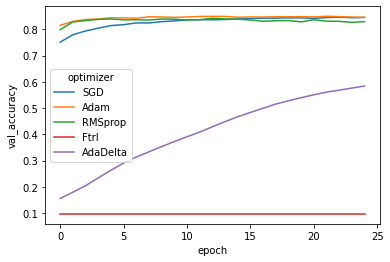

In [28]:
sns.lineplot(x='epoch', y='val_accuracy', hue='optimizer', data=df_opt);

Analysis:
* Adam performs best with similar results from SGD and RMSprop a close third. 
* AdaDelta improved with each epoch but still did not reach an acceptable threshold. Ftrl is not helpful for this dataset. 

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Backpropagation is an algorithm that updates weights within a neural network, from last to first, at the end of every epoch.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


